<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


In [ ]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import datetime

In [4]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [14]:
   set( y_train)

TypeError: unhashable type: 'numpy.ndarray'

In [12]:
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [16]:
y_train[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# 7. tensorboard_callbak and fit model on training data
logDir = "E:\\Data Since\\logs\\mlp3500\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("logDir = ",logDir)
tensorboard_callbak = TensorBoard(logDir, update_freq = "batch", histogram_freq = 1)

history = model.fit(X_train, y_train,
       epochs=20, batch_size=256, validation_split=0.2, callbacks = tensorboard_callbak)


logDir =  E:\Data Since\logs\mlp3500\20231107-212154
Epoch 1/20
11/11 [==============================] - 3s 269ms/step - loss: 0.3690 - accuracy: 0.8743 - val_loss: 0.2371 - val_accuracy: 0.9114
Epoch 2/20
11/11 [==============================] - 3s 246ms/step - loss: 0.3231 - accuracy: 0.8979 - val_loss: 0.2122 - val_accuracy: 0.9229
Epoch 3/20
11/11 [==============================] - 3s 247ms/step - loss: 0.2893 - accuracy: 0.9036 - val_loss: 0.1946 - val_accuracy: 0.9343
Epoch 4/20
11/11 [==============================] - 3s 245ms/step - loss: 0.2506 - accuracy: 0.9236 - val_loss: 0.1756 - val_accuracy: 0.9414
Epoch 5/20
11/11 [==============================] - 3s 273ms/step - loss: 0.2374 - accuracy: 0.9225 - val_loss: 0.1752 - val_accuracy: 0.9400
Epoch 6/20
11/11 [==============================] - 3s 240ms/step - loss: 0.2216 - accuracy: 0.9289 - val_loss: 0.1518 - val_accuracy: 0.9429
Epoch 7/20
11/11 [==============================] - 2s 231ms/step - loss: 0.2103 - accuracy: 0.

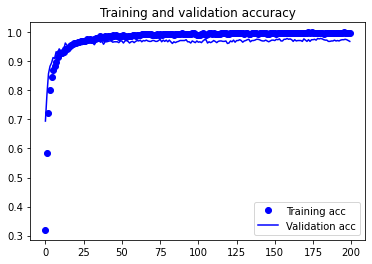

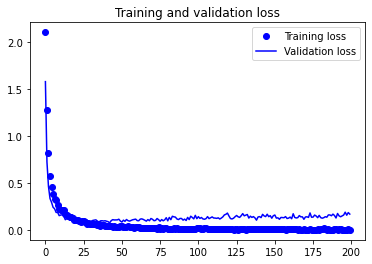

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()